#  Sympy & Scipy

In [9]:
%matplotlib inline

In [10]:
from sympy import *
init_printing()

## Plotting 

In [11]:
from sympy import *
x, t, z, nu = symbols('x t z nu')
diff(sin(x)*exp(x), x)




In [12]:
from sympy import symbols
from sympy.plotting import plot,plot3d
from sympy.abc import *



In [ ]:
x = symbols('x')
plot(x,(x,-5,5))

In [ ]:
from sympy import symbols
from sympy.plotting import plot
p1 = plot(x*x,xlabel='teste',line_color=0.0)
p2 = plot(x)
p1.extend(p2)
p1

In [ ]:
 plot3d((x**2 + y**2, (x, -5, 5), (y, -5, 5)),(x*y, (x, -3, 3), (y, -3, 3)))

In [ ]:
plot3d(sin(x*10)*cos(y*5) - x*y,(x,-10,10),(y,-10,10))

## ODE

In [ ]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

## Lançamento de Projétil

In [ ]:
m = 1.  # particle's mass
k = 1.  # drag coefficient
g = 9.81  # gravity acceleration

In [ ]:
# The initial position is (0, 0).
v0 = np.zeros(4)
# The initial speed vector is oriented
# to the top right.
v0[2] = 4.
v0[3] = 10.

In [49]:
def f(v, t0, k):
    # v has four components: v=[u, u'].
    u, udot = v[:2], v[2:]
    # We compute the second derivative u'' of u.
    udotdot = -k/m * udot
    udotdot[1] -= g
    # We return v'=[u', u''].
    return np.r_[udot, udotdot]

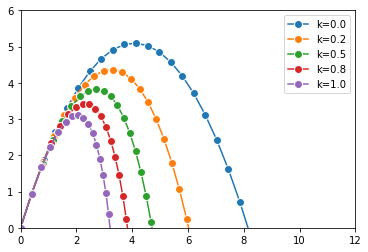

In [46]:
# We want to evaluate the system on 30 linearly
# spaced times between t=0 and t=3.
t = np.linspace(0., 3., 30)
# We simulate the system for different values of k.
for k in np.linspace(0., 1., 5):
    # We simulate the system and evaluate $v$ on
    # the given times.
    v = spi.odeint(f, v0, t, args=(k,))
    # We plot the particle's trajectory.
    plt.plot(v[:,0], v[:,1], 'o-',
             mew=1, ms=8, mec='w',
             label='k={0:.1f}'.format(k))
plt.legend()
plt.xlim(0, 12)
plt.ylim(0, 6)

## Oscilador Amortecido

In [498]:
m = 1.  # particle's mass
b = 1.  # drag coefficient
k= 1. #spring constant

In [499]:
# The initial position is (0, 0).
v0 = np.zeros(2)
# The initial speed vector is oriented
# to the top right.
v0[0] = 1.
v0[1] = 0.

In [500]:
def f(v, t0, *args):
    # v has four components: v=[u, u'].
    b,k=args
    u, udot = v[0], v[1]
    # We compute the second derivative u'' of u.
    udotdot = -b/m*udot-k/m*u
    # We return v'=[u', u''].
    return np.array([udot,udotdot])

In [501]:
t = np.linspace(0., 10., 300) 
v = spi.odeint(f, v0, t, args=(4,2))

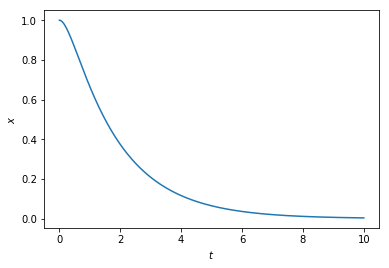

In [502]:
plt.plot(t,v[:,0], '-',
             mew=1, ms=8, mec='w')
plt.ylabel('$x$')
plt.xlabel('$t$')

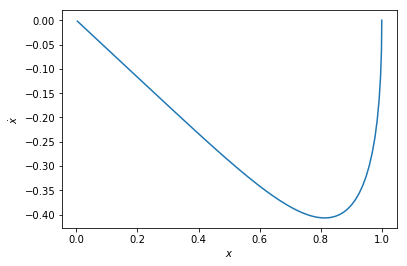

In [503]:
plt.xlabel('$x$')
plt.ylabel('$\dot{x}$')
plt.plot(v[:,0],v[:,1], '-',
             mew=1, ms=8, mec='w')


## Vários casos para a mesma condição inicial

In [504]:
from random import random
from math import cos,sin

/Users/neylemke/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


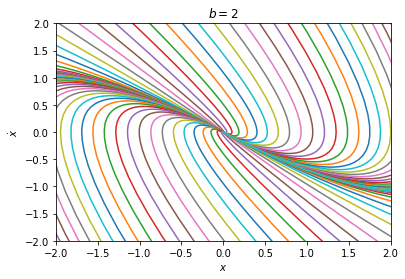

In [505]:
t = np.linspace(0., 30., 300)
for theta in np.linspace(0, 6.28, 100):
    v0=np.array([float(3*cos(theta)),float(3*sin(theta))])
    # We simulate the system and evaluate $v$ on
    # the given times.
    v = spi.odeint(f, v0, t, args=(2,1))
    # We plot the particle's trajectory.
    plt.plot(v[:,0], v[:,1], '-',mew=1, ms=8, mec='w')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$\dot{x}$')
plt.title('$b=2$')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

##  Diagrama de  Fase para  vários parâmetros

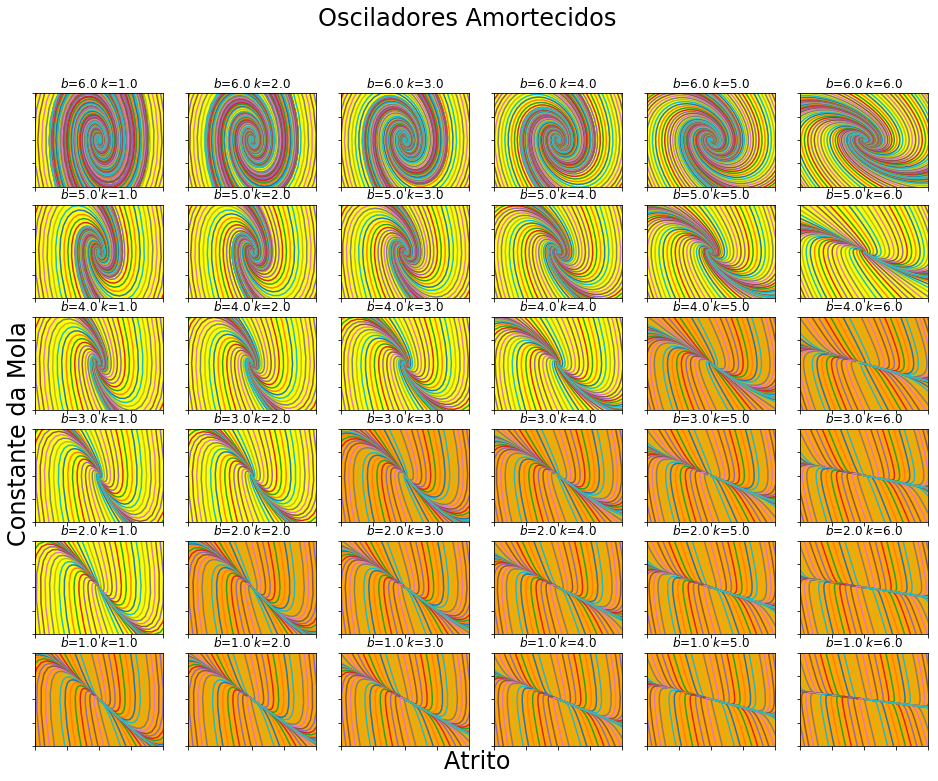

In [506]:
t = np.linspace(0., 30., 300)
nmax=6
fig, axarr = plt.subplots(nmax, nmax,figsize=(16,12))
for i in range(nmax):
    for j in range(nmax):
        for theta in np.linspace(0, 6.28, 100):
            v0=np.array([float(3*cos(theta)),float(3*sin(theta))])
    # We simulate the system and evaluate $v$ on
    # the given times.
            v = spi.odeint(f, v0, t, args=(i+1,nmax-j))
    # We plot the particle's trajectory.
            axarr[i,j].plot(v[:,0], v[:,1], '-',mew=1, ms=8, mec='w')
            if (4*(nmax-j)<=(i+1)**2):
                color='yellow'
            else:
                color='orange'
            axarr[nmax-i-1,nmax-j-1].set_facecolor(color) 
            axarr[nmax-i-1,nmax-j-1].set_xlim(-2,2)
            axarr[nmax-i-1,nmax-j-1].set_ylim(-2,2)
            axarr[nmax-i-1,nmax-j-1].set_title('$b$={:2.1f} $k$={:2.1f}'
                                 .format((i+1)*1.0,(nmax-j)*1.0))
plt.setp([axarr[i, j].get_xticklabels() for i in range(nmax) for j in range(nmax)], visible=False)
plt.setp([axarr[i, j].get_yticklabels() for i in range(nmax) for j in range(nmax)], visible=False)
axarr[nmax-1,2].set_xlabel('                   Atrito',size=24)
axarr[3,0].set_ylabel('           Constante da Mola',size=24)
plt.suptitle('Osciladores Amortecidos',size=24)
plt.show()

## Oscilações Forçadas

### Método Numérico

In [ ]:
def ff(v, t0, *args):
    # v has four components: v=[u, u'].
    b,k,A,omega=args
    u, udot = v[0], v[1]
    # We compute the second derivative u'' of u.
    udotdot = -b/m*udot-k/m*u+A*cos(omega*t0)/m
    # We return v'=[u', u''].
    return np.array([udot,udotdot])

In [ ]:
t = np.linspace(0., 30., 300) 
v = spi.odeint(ff, v0, t, args=(4,2,1,1))

In [ ]:
plt.plot(t,v[:,0], '-',
             mew=1, ms=8, mec='w')
plt.ylabel('$x$')
plt.xlabel('$t$')

In [ ]:
plt.xlabel('$x$')
plt.ylabel('$\dot{x}$')
plt.plot(v[:,0],v[:,1], '-',
             mew=1, ms=8, mec='w')

In [ ]:
t = np.linspace(0., 300., 300)
A=2
omega=2
b=0.1
k=4.
for theta in np.linspace(0, 6.28, 100):
    v0=np.array([float(3*cos(theta)),float(3*sin(theta))])
    # We simulate the system and evaluate $v$ on
    # the given times.
    v = spi.odeint(ff, v0, t, args=(b,k,A,omega))
    # We plot the particle's trajectory.
    plt.plot(v[:,0], v[:,1], '-',mew=1, ms=8, mec='w')
plt.legend()
plt.xlabel('$x$',size=16)
plt.ylabel('$\dot{x}$',size=16)
plt.title('$b$={} $k$={} $A$={} $\omega$={}'.format(b,k,A,omega))
plt.xlim(-2, 2)
plt.ylim(-2, 2)

In [ ]:
tmax=3000
steps=30000
t = np.linspace(0., tmax, steps) 
def maxinv(omega):
    v = spi.odeint(ff, v0, t, args=(0.1,4,1,omega))
    return [omega,max(v[-10000:,0]),min(-v[-10000:,0])] 
    
Amax=np.array([maxinv(omega) for omega in np.linspace(0.1, 5, num=100)])


In [ ]:
plt.plot(Amax[:,0],Amax[:,1])
plt.plot(Amax[:,0],-Amax[:,2])
plt.show

###  Versão Analítica

In [ ]:
from sympy import Function, dsolve, Eq, Derivative, sin, cos
from sympy import symbols,latex,init_printing,simplify,trigsimp
from sympy.abc import t,omega,b,k,m
from operator import *
from functools import reduce


In [ ]:
g = Function('g')
b,k,omega,A=symbols('b k omega A')
init_printing()
expr=dsolve(m*Derivative(g(t), t, t) +b*Derivative(g(t), t)+k*g(t)-A*cos(omega*t), 
       g(t))

In [ ]:
expr

In [ ]:
terms=expr.args[1].args[2:]
terms2=trigsimp(simplify(terms[0]+terms[1]+terms[2]))


In [ ]:
terms

In [ ]:
terms3=reduce(add,terms)

In [ ]:
terms3

In [ ]:
from sympy.simplify.fu import TR9
from sympy import factor,sqrt,tan,atan,evalf


In [ ]:
terms2

In [ ]:
terms4=factor(terms2.args[-1])
terms3=reduce(mul,terms2.args[0:2])

In [ ]:
term5=terms4.args[0].args[0]+reduce(mul,terms4.args[2].args[0:3])
term6=terms4.args[1].args[0]*terms4.args[1].args[1]

In [ ]:
coef=sqrt(term5**2+term6**2)*terms3

In [ ]:
coef

In [ ]:
delta=atan(term6/term5)

A solução é finalmente

In [ ]:
coef*sin(omega*t+delta)

In [ ]:
print(coef)

In [ ]:
b=0.1
k=4
m=1
A=1

In [ ]:
ampteo=[ A/sqrt(b**2*omega**2 + (k - m*omega**2)**2) 
        for omega in np.linspace(0.1, 5, num=100)]

In [ ]:
plt.plot(np.linspace(0.1, 5, num=100),ampteo)
plt.plot(Amax[:,0],Amax[:,1],'o')
plt.show

In [ ]:
from sympy import diff,solve
eqw=diff(coef,omega)

In [ ]:
eqw

In [ ]:
sol=solve(eqw.args[2],omega)

In [ ]:
print(latex(sol[2]))

$$\frac{\sqrt{2}}{2} \sqrt{\frac{1}{m^{2}} \left(2 k m-b^{2}\right)}$$


In [ ]:
b=0.1
k=4
m=1
A=1

(sqrt(2)*sqrt(-(b**2 - 2*k*m)/m**2)/2).evalf()

In [ ]:
expand(sol[2])

In [2]:

from sympy import expand


In [3]:

expand(sol[2])

NameError: name 'sol' is not defined